In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [7]:
noise.shape

(1000000,)

In [8]:
noise

array([-0.38252988,  0.85042809, -1.19502441, ..., -1.03637751,
        0.15748145,  1.76142862])

y = mx + b
b = 5

In [10]:
y_true = (0.5 * x_data) + 5 + noise #true values; try to get model to figure out values of m and b

In [12]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [14]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [15]:
x_df.head() #first 5 rows

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [16]:
y_df.head()

,Y
0,4.617470
1,5.850433
2,3.804986
3,6.625315
4,4.536953


In [25]:
my_data = pd.concat([x_df,y_df],axis=1) #concatenates 2 dataframes; axis=1 means combine along columns

In [27]:
my_data.head()

,X Data,Y
0,0.00000,4.617470
1,0.00001,5.850433
2,0.00002,3.804986
3,0.00003,6.625315
4,0.00004,4.536953


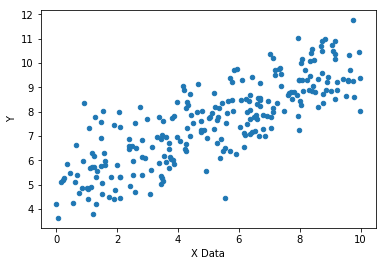

In [31]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y') #gets 250 random sample from dataframe; small set so kernel can handle

Based on these data points, we want TF to guess the line y = 0.5x + 5

In [32]:
batch_size = 8 # feed in batches of data for training

In [35]:
np.random.randn(2)

array([ 0.1725247 , -1.48573987])

In [36]:
m = tf.Variable(0.64) #slope

In [37]:
b = tf.Variable(2.68)

In [38]:
xph = tf.placeholder(dtype=tf.float32,shape=[batch_size]) #x placeholder

In [39]:
yph = tf.placeholder(dtype=tf.float32,shape=[batch_size]) #y placeholder

In [40]:
y_model = m * xph + b

In [42]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [43]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [44]:
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000 #if = 1000 and batch_size = 8, model will train on 8,000 points
    for i in range(batches):
        rand_ind = np.random.randint(0,high=len(x_data),size=batch_size) #random index
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [52]:
model_m #this slope should be close to true slope = 0.5

0.53127831

In [53]:
model_b #this y-intercept should be close to true intercept = 5

4.9784207

In [54]:
y_hat = x_data * model_m + model_b

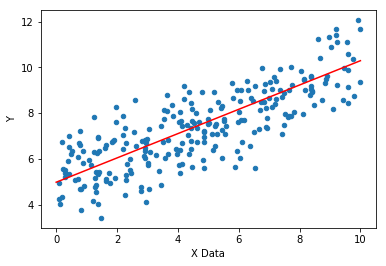

In [58]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r') #straight line

# TF Estimator

In [60]:
feat_cols = [ tf.feature_column.numeric_column(key='x',shape=[1]) ]

In [61]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpnyj2544e', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [66]:
print(x_train.shape) #training data is 70% by default

(700000,)


In [68]:
x_eval.shape #test (evaluation) data is 30% by default

(300000,)

In [72]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,
                                                num_epochs=None,shuffle=True)

In [73]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,
                                                num_epochs=1000,shuffle=False)

In [74]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,
                                                num_epochs=1000,shuffle=False)

In [75]:
estimator.train(input_fn=input_func,steps=1000) #steps == epochs ?

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpnyj2544e/model.ckpt.
INFO:tensorflow:loss = 493.314, step = 1
INFO:tensorflow:global_step/sec: 683.935
INFO:tensorflow:loss = 25.7091, step = 101 (0.151 sec)
INFO:tensorflow:global_step/sec: 679.117
INFO:tensorflow:loss = 6.80853, step = 201 (0.145 sec)
INFO:tensorflow:global_step/sec: 768.013
INFO:tensorflow:loss = 19.7048, step = 301 (0.130 sec)
INFO:tensorflow:global_step/sec: 786.147
INFO:tensorflow:loss = 5.91704, step = 401 (0.127 sec)
INFO:tensorflow:global_step/sec: 736.538
INFO:tensorflow:loss = 24.5997, step = 501 (0.136 sec)
INFO:tensorflow:global_step/sec: 700.949
INFO:tensorflow:loss = 14.2171, step = 601 (0.144 sec)
INFO:tensorflow:global_step/sec: 679.402
INFO:tensorflow:loss = 5.05825, step = 701 (0.146 sec)
INFO:tensorflow:global_step/sec: 519.184
INFO:tensorflow:loss = 8.66149, step = 801 (0.193 sec)
INFO:tensorflow:global_step/

In [77]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000) #use train instead of
                                                    #input since we don't want it to shuffle

INFO:tensorflow:Starting evaluation at 2017-12-29-15:46:39
INFO:tensorflow:Restoring parameters from /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpnyj2544e/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [430/1000]
INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [860/1000]
INFO:tensorflow:Evaluation [861/1000]
INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorf

In [78]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-12-29-15:47:55
INFO:tensorflow:Restoring parameters from /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpnyj2544e/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [79]:
print('Training Data Metrics:')
print(train_metrics)

Training Data Metrics:
{'average_loss': 1.087855, 'loss': 8.7028399, 'global_step': 1000}


In [81]:
print('Evaluation Metrics') #NOTE: model may be overfitting to training data if very low loss
print(eval_metrics) #... in training data, high loss in eval data

Evaluation Metrics
{'average_loss': 1.074771, 'loss': 8.5981684, 'global_step': 1000}


In [ ]:
# how to predict new values:

In [83]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [85]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpnyj2544e/model.ckpt-1000


[{'predictions': array([ 4.43195248], dtype=float32)},
 {'predictions': array([ 5.07302809], dtype=float32)},
 {'predictions': array([ 5.7141037], dtype=float32)},
 {'predictions': array([ 6.35517931], dtype=float32)},
 {'predictions': array([ 6.99625492], dtype=float32)},
 {'predictions': array([ 7.63733053], dtype=float32)},
 {'predictions': array([ 8.27840614], dtype=float32)},
 {'predictions': array([ 8.91948128], dtype=float32)},
 {'predictions': array([ 9.56055832], dtype=float32)},
 {'predictions': array([ 10.20163345], dtype=float32)}]

In [86]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpnyj2544e/model.ckpt-1000


In [87]:
predictions

[array([ 4.43195248], dtype=float32),
 array([ 5.07302809], dtype=float32),
 array([ 5.7141037], dtype=float32),
 array([ 6.35517931], dtype=float32),
 array([ 6.99625492], dtype=float32),
 array([ 7.63733053], dtype=float32),
 array([ 8.27840614], dtype=float32),
 array([ 8.91948128], dtype=float32),
 array([ 9.56055832], dtype=float32),
 array([ 10.20163345], dtype=float32)]

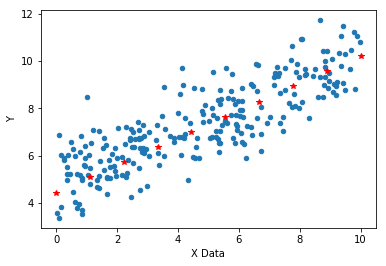

In [90]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y') #plots original data
plt.plot(brand_new_data,predictions,'r*') #plots brand new data